In [5]:
%matplotlib notebook
import numpy as np
import os
import sys
from matplotlib import pyplot as plt
#from matplotlib import animation
#Path to the scripts shared troughout phases
parent_path=os.path.abspath('..')
path_common =  '/'.join(parent_path.split('/')[:-1])
save_path = os.path.join(parent_path,'Moving_Rigidbody','Plots','rollout_performance','no_gravity_fixed_box_fixed_not_in_error')
if(not os.path.exists(save_path)):
    os.makedirs(save_path)

In [6]:
basis_path = os.path.join(parent_path,'Moving_Rigidbody','small','no_gravity_fixed_box_fixed_not_in_error')
one_basis = basis_path
one_way_tr = []
one_way_ge_pred = []
one_way_ge_true = []
one_way_te_pred = []
one_way_te_true = []
for folder in os.listdir(one_basis):
    path_to_saves = os.path.join(one_basis,folder,'Saves')
    one_way_tr.append(np.load(os.path.join(path_to_saves,'losses_tr.npy')))
    one_way_ge_pred.append(np.load(os.path.join(path_to_saves,'predicted_trajectory_ge.npy')))
    one_way_ge_true.append(np.load(os.path.join(path_to_saves,'true_trajectory_ge.npy')))
    one_way_te_pred.append(np.load(os.path.join(path_to_saves,'predicted_trajectory_te.npy')))
    one_way_te_true.append(np.load(os.path.join(path_to_saves,'true_trajectory_te.npy')))


one_way_tr = np.array(one_way_tr)
one_way_te_pred_f = np.array(one_way_te_pred)
one_way_te_true_f = np.array(one_way_te_true)
one_way_ge_pred_f = np.array(one_way_ge_pred)
one_way_ge_true_f = np.array(one_way_ge_true)


(51,)


<IPython.core.display.Javascript object>


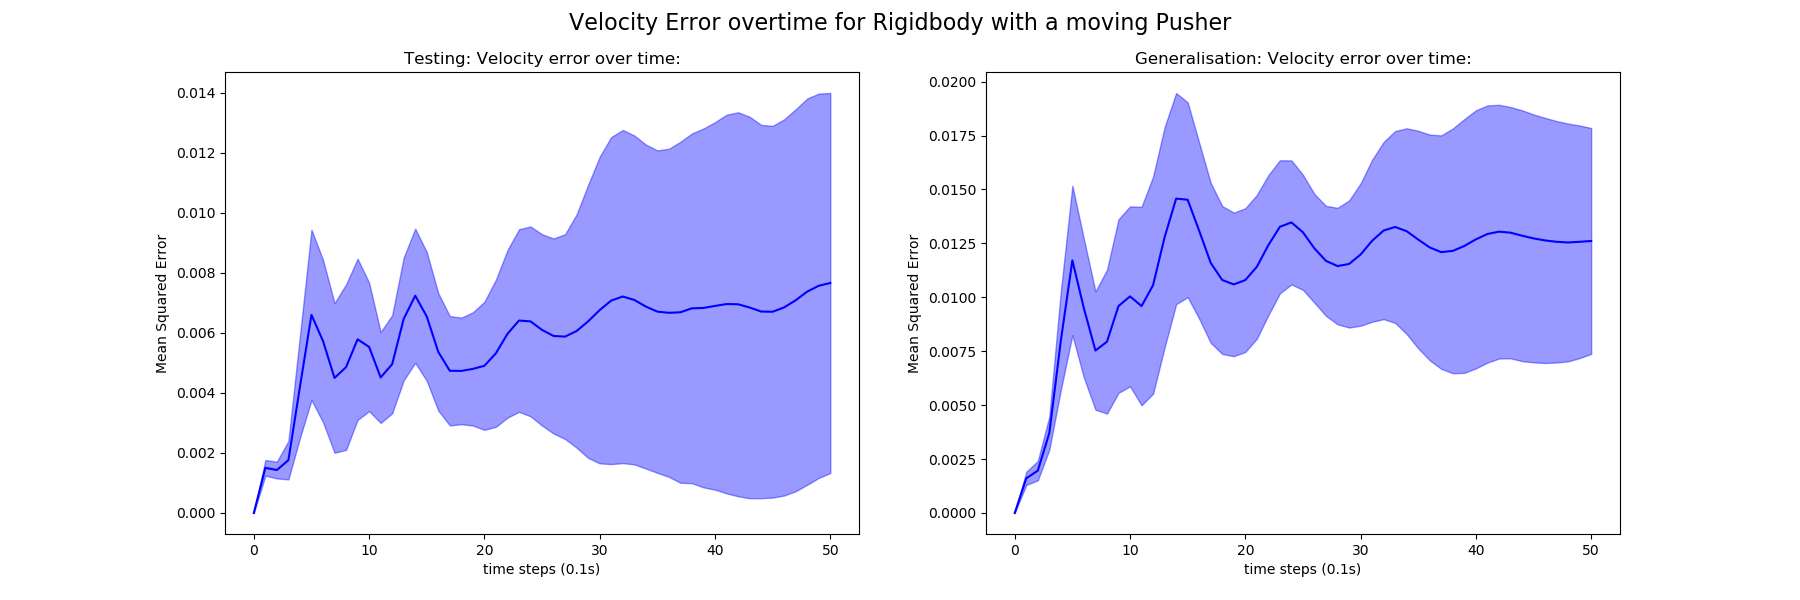

In [7]:

one_way_te_pred = one_way_te_pred_f[...,2:4]
one_way_te_true = one_way_te_true_f[...,2:4]
one_way_ge_pred = one_way_ge_pred_f[...,2:4]
one_way_ge_true = one_way_ge_true_f[...,2:4]


one_way_error = np.square(one_way_te_true - one_way_te_pred)
one_way_error = np.sum(one_way_error,axis=-1)
one_way_error = np.mean(one_way_error,axis = -1)
one_way_error = np.mean(one_way_error,axis = 1)
one_way_ge_mean = np.mean(one_way_error,axis = 0)
one_way_ge_std = np.std(one_way_error,axis = 0)


x = list(range(len(one_way_ge_mean)))
y1 = one_way_ge_mean
print(y1.shape)
e1 = one_way_ge_std

plt.close('all')
fig = plt.figure(1, figsize=(18, 6))
fig.clf()
ax = fig.add_subplot(1, 2, 1)
ax.plot(x, y1, "b")
plt.fill_between(x, y1-e1, y1+e1, color = "b",alpha=0.4)

ax.set_title("Testing: Velocity error over time:")
ax.set_xlabel("time steps (0.1s)")
ax.set_ylabel("Mean Squared Error")


one_way_error = np.square(one_way_ge_true - one_way_ge_pred)
one_way_error = np.sum(one_way_error,axis=-1)
one_way_error = np.mean(one_way_error,axis = -1)
one_way_error = np.mean(one_way_error,axis = 1)
one_way_ge_mean = np.mean(one_way_error,axis = 0)
one_way_ge_std = np.std(one_way_error,axis = 0)


x = list(range(len(one_way_ge_mean)))
y1 = one_way_ge_mean
e1 = one_way_ge_std

ax = fig.add_subplot(1, 2, 2)
ax.plot(x, y1, "b")
plt.fill_between(x, y1-e1, y1+e1, color = "b",alpha=0.4)

ax.set_title("Generalisation: Velocity error over time:")
ax.set_xlabel("time steps (0.1s)")
ax.set_ylabel("Mean Squared Error")


fig.suptitle("Velocity Error overtime for Rigidbody with a moving Pusher", fontsize=16)



plt.show()
#Save figure                  
fig.savefig(os.path.join(save_path,'Prediction_velocity_errors_small.pdf'))

(51,)


<IPython.core.display.Javascript object>


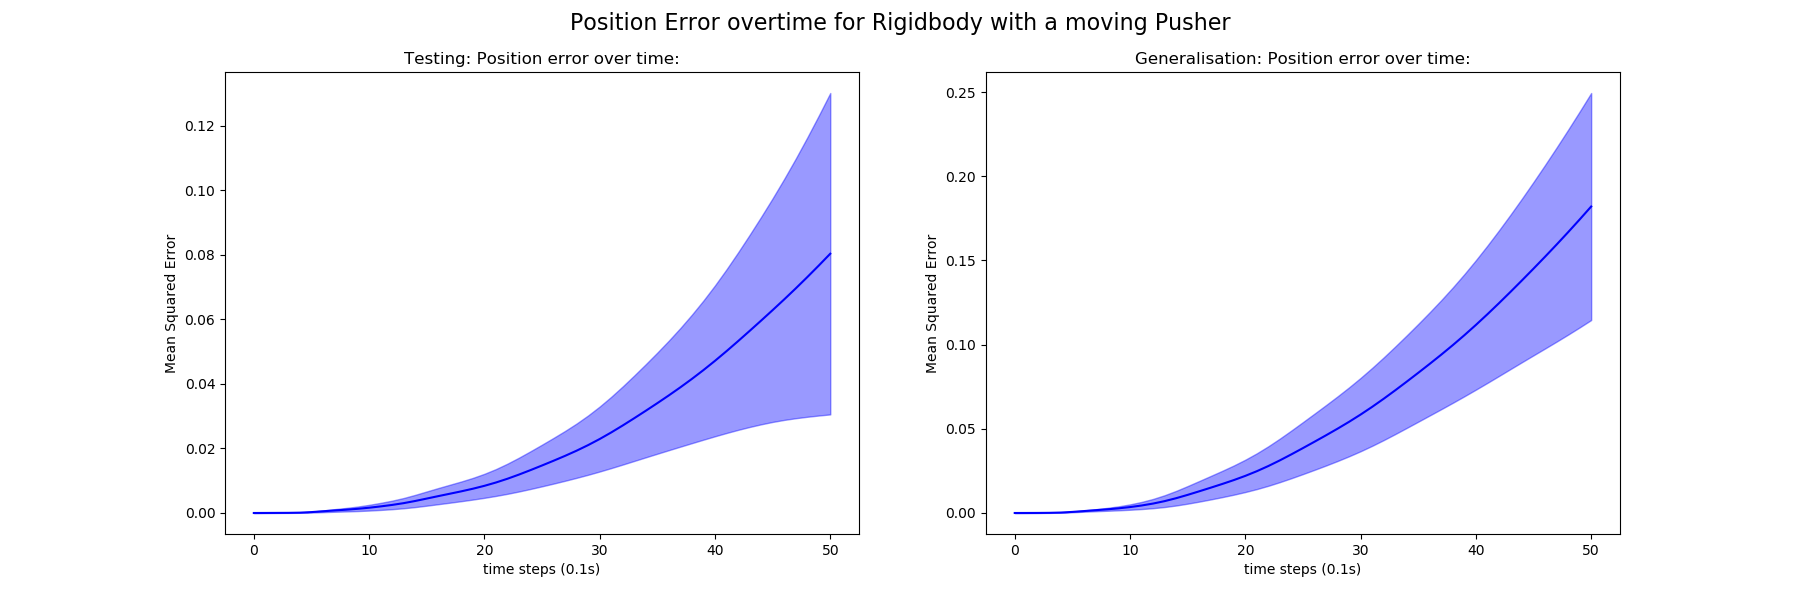

In [8]:

one_way_te_pred = one_way_te_pred_f[...,:2]
one_way_te_true = one_way_te_true_f[...,:2]
one_way_ge_pred = one_way_ge_pred_f[...,:2]
one_way_ge_true = one_way_ge_true_f[...,:2]

one_way_error = np.square(one_way_te_true - one_way_te_pred)
one_way_error = np.sum(one_way_error,axis=-1)
one_way_error = np.mean(one_way_error,axis = -1)
one_way_error = np.mean(one_way_error,axis = 1)
one_way_ge_mean = np.mean(one_way_error,axis = 0)
one_way_ge_std = np.std(one_way_error,axis = 0)


x = list(range(len(one_way_ge_mean)))
y1 = one_way_ge_mean
print(y1.shape)
e1 = one_way_ge_std

plt.close('all')
fig = plt.figure(1, figsize=(18, 6))
fig.clf()
ax = fig.add_subplot(1, 2, 1)
ax.plot(x, y1, "b")
plt.fill_between(x, y1-e1, y1+e1, color = "b",alpha=0.4)

ax.set_title("Testing: Position error over time:")
ax.set_xlabel("time steps (0.1s)")
ax.set_ylabel("Mean Squared Error")


one_way_error = np.square(one_way_ge_true - one_way_ge_pred)
one_way_error = np.sum(one_way_error,axis=-1)
one_way_error = np.mean(one_way_error,axis = -1)
one_way_error = np.mean(one_way_error,axis = 1)
one_way_ge_mean = np.mean(one_way_error,axis = 0)
one_way_ge_std = np.std(one_way_error,axis = 0)


x = list(range(len(one_way_ge_mean)))
y1 = one_way_ge_mean
e1 = one_way_ge_std

ax = fig.add_subplot(1, 2, 2)
ax.plot(x, y1, "b")
plt.fill_between(x, y1-e1, y1+e1, color = "b",alpha=0.4)

ax.set_title("Generalisation: Position error over time:")
ax.set_xlabel("time steps (0.1s)")
ax.set_ylabel("Mean Squared Error")

fig.suptitle("Position Error overtime for Rigidbody with a moving Pusher", fontsize=16)


plt.show()
#Save figure                  
fig.savefig(os.path.join(save_path,'Prediction_position_errors_small.pdf'))